In [2]:
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

exp_path = "outputs/exp5_aleatory_linear_circle_3_9_1000/"
indicators_file = exp_path + 'data.csv'
df = pd.read_csv(indicators_file)
print("Indicators Loaded")
df

Indicators Loaded


,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,3,5,4,2,2,5,3,1,0.179143,0.000120,0.000084
1,1,4,5,4,2,2,7,5,1,0.237144,0.000115,0.000083
2,1,5,5,4,2,2,9,7,1,0.273836,0.000100,0.000069
3,1,6,5,4,2,2,11,9,1,0.345582,0.000121,0.000079
4,1,7,5,4,2,2,13,11,1,0.408823,0.000149,0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1000,5,5,2,2,2,25,93,243,0.691128,0.000417,0.035092
20996,1000,6,5,2,2,2,35,156,729,0.969734,0.000366,0.065180
20997,1000,7,5,2,2,2,39,150,2187,1.154297,0.000285,0.148197
20998,1000,8,5,2,2,2,43,180,6561,1.274000,0.000409,1.680547


outputs/exp5_aleatory_linear_circle_3_9_1000/pkl_cbn/cbn_1_
2


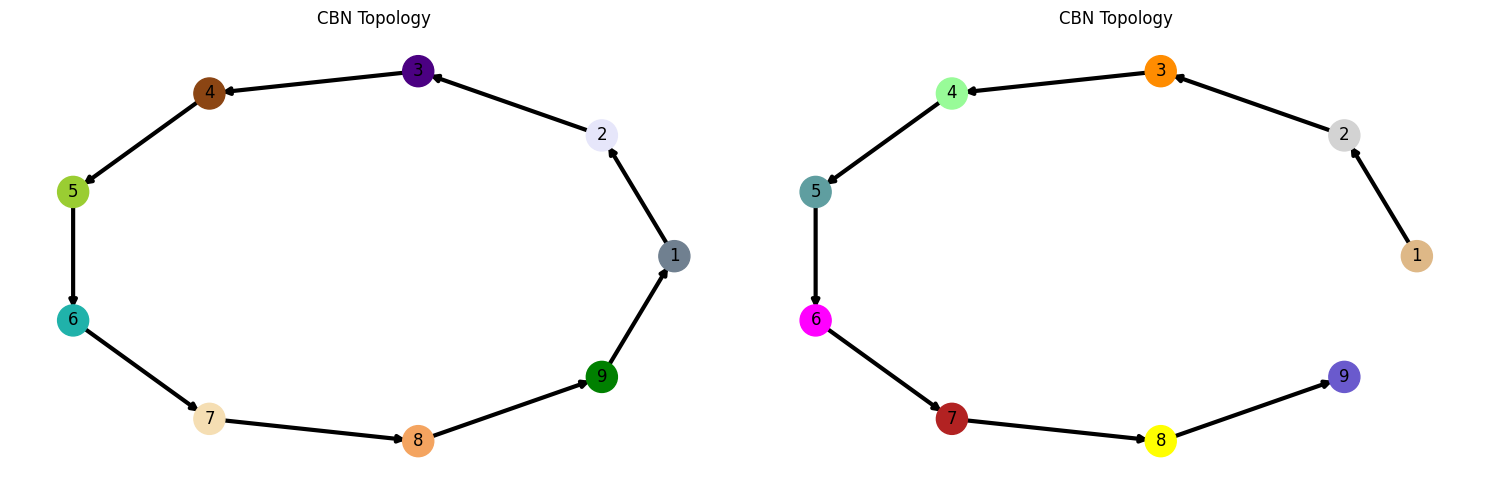

In [24]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Selecionar os dados dos i_sample de topologia
i_sample = 1
n_local_networks = df['n_local_networks'].max()
l_topologies = [3, 4]

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp5_aleatory_linear_circle_3_9_1000/pkl_cbn/cbn_{i_sample}_'
print(base_path_cbn)

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in l_topologies if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)
print(total_graphs)

# Configuración de subplots en múltiples filas y columnas
cols = 2
rows = max(1, (total_graphs + cols - 1) // cols)  # Asegurar que rows sea al menos 1

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Aplanar la matriz de ejes si hay más de una fila
axes = axes.ravel() if total_graphs > 1 else [axes]

# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Mostrar la información de CBN en el subplot correspondiente
    o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax
    
# Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
for ax in axes[total_graphs:]:
    fig.delaxes(ax)

# Ajustar el layout y mostrar todas las gráficas juntas
plt.tight_layout()
plt.show()


In [11]:
# Filter by the number of local networks
n_local_networks = df['n_local_networks'].max()
df_filter = df[df['n_local_networks'] == n_local_networks]
num_registers = df_filter.shape[0]
print(f"There are {num_registers} records for RBAs with {n_local_networks} local networks.")

There are 3000 records for RBAs with 9 local networks.
